<a href="https://colab.research.google.com/github/IkeKobby/fatima-fellowship/blob/main/Isaac_Kobby_Anni_Fatima_Fellowship_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fatima Fellowship Quick Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. 

**Due date: 1 week**

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook to the submission link below. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw).

**Submission link**: https://airtable.com/shrXy3QKSsO2yALd3

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
* Develop an NLP model for classification that uses a pretrained language model
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# installing ktrain
!pip install ktrain

### Setting keras training configuration

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [4]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

In [5]:
clean_data_path = '/content/drive/MyDrive/fake-and-real-news-dataset/cleaned_text.csv'

- The preprocessing code can be found [here](https://github.com/IkeKobby/fatima-fellowship/blob/main/Data_Preprocessing_Fatima_Fellowship.ipynb). The data comes with both the original article plus `(title and subject)` concatenated to together. 

In [6]:
# Loading cleaned text. 
cleaned_data = pd.read_csv(clean_data_path)
cleaned_data.head(10)

,article,label,clean_article
0,MATT DAMON Says America Needs IMMEDIATE GUN BA...,0,matt damon says america needs immediate gun ba...
1,SEE GEORGE STEPHANOPOULOS’ Reaction When Hilla...,0,see george stephanopoulos reaction when hillar...
2,Listen To Ann Coulter Pretend She Likes Jews ...,0,listen to ann counter pretend she likes jews w...
3,Transcripts of Clinton's Wall Street talks rel...,1,transcripts clinton wall street talks released...
4,Jailed Cameroon writer who criticized governme...,1,jailed cameroon writer criticized government e...
5,Watch Bernie Sanders DESTROY Republican Ranti...,0,watch bernie sanders destroy republican rantin...
6,Kenya officials change way of announcing elect...,1,kenya officials change way announcing election...
7,HYSTERICAL: Trump Warns “Sleepy Eyes” Chuck To...,0,hysterical trump warns sleepy eyes chuck todd ...
8,"AMERICANS FURIOUS, Lash Out After Liberals Use...",0,americans furious lash out after liberals use ...
9,Dem Senator On Trump World: ‘They Lie As Easi...,0,dem senator on trump world they lie as easily ...


### Getting data ready for training
The original data was processed and prepared for modeling as follows;

- I concatenated the `title`, `article` and `subject` together as one text for training. Prior to this each set, that is, `real.csv` and `fake.csv` was created a `label` column. `0` for the `fake.csv` and `1` for the `real.csv` after the concatenation. 
- for ease of training, even though transformer models especially the `uncased` do have their preprocessing methods, I like to do it manually after exploring the data. I removed `special characters, non english characters, unnecessary spaces, spell check`, after which the data was saved for training. 
- unfortunately for me, after several trial to train the model in `colab's GPU` and colab disconnecting several times, I resulted to using only `30%` of the entire dataset to get results after using `60%`, `50%` and `40%` but GPU issues. Hence, the model, `pretrained distilbert-base-uncased` I used here was only trained on `30%` of the dataset and of course it had an incredible results. Looking forward, if resources, like `GPU supported laptops` are available, i could train the entire dataset to have a full glimpse on the model's performance.

In [7]:

data_for_modeling = cleaned_data[: int(len(cleaned_data) * .3)]
data_for_modeling.shape

(13469, 3)

In [8]:
# getting data ready for training 
# data splitting 
train_input, validation_input, test_input = np.split(data_for_modeling['clean_article'], [int(.70 * len(data_for_modeling)), int(.90 * len(data_for_modeling))])
train_label, validation_label, test_label = np.split(data_for_modeling['label'], [int(.70 * len(data_for_modeling)), int(.90 * len(data_for_modeling))])

# reset indexes for validation and training
train_input = train_input.values
train_label = train_label.values
validation_input = validation_input.reset_index(drop = True).values
validation_label = validation_label.reset_index(drop = True).values
test_input = test_input.reset_index(drop = True).values
test_label = test_label.reset_index(drop = True).values

In [10]:
# class names
class_names = ['fake', 'real']

In [11]:
### Some global variables 
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 512
BATCH_SIZE = 16
EPOCHS = 5

transformer = text.Transformer(model_name=MODEL_NAME, maxlen=MAX_LEN, class_names=class_names)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [12]:
# train data
train_data = transformer.preprocess_train(train_input, train_label)
validation_data = transformer.preprocess_train(validation_input, validation_label)

preprocessing train...
language: en
train sequence lengths:
	mean : 241
	95percentile : 537
	99percentile : 817


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 244
	95percentile : 525
	99percentile : 868


Is Multi-Label? False


### Building classifier

In [13]:
transformer_classifier = transformer.get_classifier()

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

### Compiling the model for training

In [14]:
training_learner = ktrain.get_learner(model = transformer_classifier,
                                      train_data = train_data,
                                      val_data = validation_data,
                                      batch_size = BATCH_SIZE)

### Finding an optimal learning rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
589/589 [==============================] - 566s 940ms/step - loss: 0.5260 - accuracy: 0.7228
Epoch 2/5
589/589 [==============================] - 556s 945ms/step - loss: 0.0445 - accuracy: 0.9917
Epoch 3/5
589/589 [==============================] - 414s 702ms/step - loss: 0.2168 - accuracy: 0.8714


done.
Visually inspect loss plot and select learning rate associated with falling loss


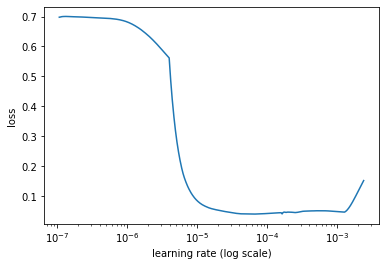

In [15]:
training_learner.lr_find(show_plot=True, max_epochs=EPOCHS)

### Training

In [16]:
# fit model
training_learner.fit_onecycle(lr = 1e-4, epochs=EPOCHS)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
590/590 [==============================] - 622s 1s/step - loss: 0.0794 - accuracy: 0.9756 - val_loss: 0.0169 - val_accuracy: 0.9970
Epoch 2/5
590/590 [==============================] - 613s 1s/step - loss: 0.0174 - accuracy: 0.9965 - val_loss: 0.0324 - val_accuracy: 0.9929
Epoch 3/5
590/590 [==============================] - 613s 1s/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.0083 - val_accuracy: 0.9978
Epoch 4/5
590/590 [==============================] - 612s 1s/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/5
590/590 [==============================] - 615s 1s/step - loss: 9.1651e-04 - accuracy: 0.9999 - val_loss: 0.0030 - val_accuracy: 0.9993


### Evaluating

In [18]:
# prepare test data for evaluations
test_data = transformer.preprocess_train(test_input, test_label)

preprocessing train...
language: en
train sequence lengths:
	mean : 232
	95percentile : 517
	99percentile : 794


Is Multi-Label? False


In [20]:
# evaluate model
training_learner.validate(val_data=test_data)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       721
           1       1.00      1.00      1.00       626

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



array([[721,   0],
       [  1, 625]])

In [21]:
# get predictor for predictions
predictor = ktrain.get_predictor(training_learner.model, preproc= transformer)

### Saving model

In [22]:
save_directory = '/content/drive/MyDrive/fake-and-real-news-dataset/training/fake-real-news-predictor'
predictor.save(save_directory)

### Misclassified samples

- Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [23]:
# Top 10 misclassified news articles
training_learner.view_top_losses(n=10, preproc = transformer)

----------
id:846 | loss:4.75 | true:real | pred:fake)

----------
id:1295 | loss:2.42 | true:fake | pred:real)



- The model misclassified texts with `ids` `846` and `1295`. 

In [15]:
# Wrongly predicted texts
text_with_id_846 = test_input[846]
print(f'Text 1: {text_with_id_846}')

print('\n')

text_with_id_1295 = test_input[1295]
print(f'Text 2: {text_with_id_1295}')

Text 1: trump twitter dec tax cut missile defense billie following statements posted verified twitter accounts president donald trump realdonaldtrump pots the opinions expressed reuters edited statements confirmed accuracy realdonaldtrump our big popular tax cut reform bill taken unexpected new source love big companies corporations showing workers bonuses this phenomenon nobody even thought rage merry christmas est at point good country i predict start working democrats bipartisan fashion infrastructure would perfect place start after foolish spent trillion middle east time start rebuilding country est the president accomplished absolutely historic things past thank charlie kirk turning points usa sadly fake mainstream media never talk accomplishments end year reviews we compiling long beautiful list est with administration done legislative approvals broke harry human record regulation cutting judicial appointments building military va tax cuts reform record market much i sure great c

- The first text which is of a political subject is contained in a social domain and could contribute to the model misclassifying it as fake. Possibly, since the model is validated on only 20% of the 30% of the entire dataset, training with entire data could improve learning of similar articles.
- Moreover, the second text also contains politically related context, which most definity confuses the model to be `real` instead of `fake`. As mentioned above, leveraging the entire data could contribute greatly to the model learning. 

## Loading model and evaluating

In [9]:
save_directory = '/content/drive/MyDrive/fake-and-real-news-dataset/training/fake-real-news-predictor'
# Evaluation with ROC_AUC
predictor = ktrain.load_predictor(save_directory)
# predict on test data
predictions = predictor.predict(test_input, return_proba=True)
predicted_labels = np.argmax(predictions, axis = 1)

## AUC-ROC Curve

* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = round(roc_auc_score(test_label, predicted_labels), 2)

# plotting the roc_curve
predicted_probas = predictions[:, 1]
false_positive_rate, true_positive_rate, _ = roc_curve(test_label,  predicted_probas)

In [13]:
import matplotlib.pyplot as plt

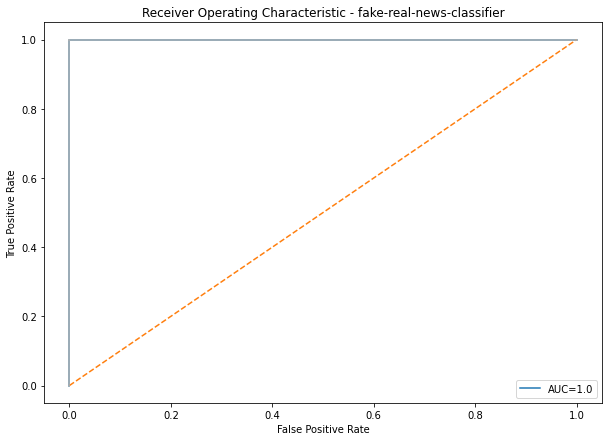

In [14]:
plt.figure(figsize = (10,7))
plt.title('Receiver Operating Characteristic - fake-real-news-classifier')
plt.plot(false_positive_rate, true_positive_rate, label="AUC="+str(auc))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Write up**: 
* Link to the model on Hugging Face Hub: [Click here](https://huggingface.co/ikekobby/fake-real-news-classifier) for the model on Hugging Face repo.

**Conclusion**:
- This coding has personally been helpful and taughtful to me having to read several documentations and articles to `preprocess data`, `prepare data for training`, `build model` and `evaluate model`. I believe that when the opportunity is given to me I shall be challenged to `read more`, `research more`, `implement more papers` while improving my research skills for future doctoral position.

**Thank you.**